# 결과분석
* Sample 실험 항목
    * 10092_농심오징어집83G
    * 10095_농심바나나킥75G

* 학습정보
    * `model`: yolov8s.pt → COCO 데이터세트를 미리 학습한 모델에 학습 진행
    * `epoch`: 300
    * `optimizer`: Adam
    * `imgsz`: 640
    * Hyperparameter (default)
        * `learning late`: 0.01
        * `box`: 7.5
        * `cls`: 0.5
        * `dfl`: 1.5
        * `Adam beta1`: 0.937
        * `weight_decay`: 0.0005



### 01 결과 이미지

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

IMG_PATH = "./result"

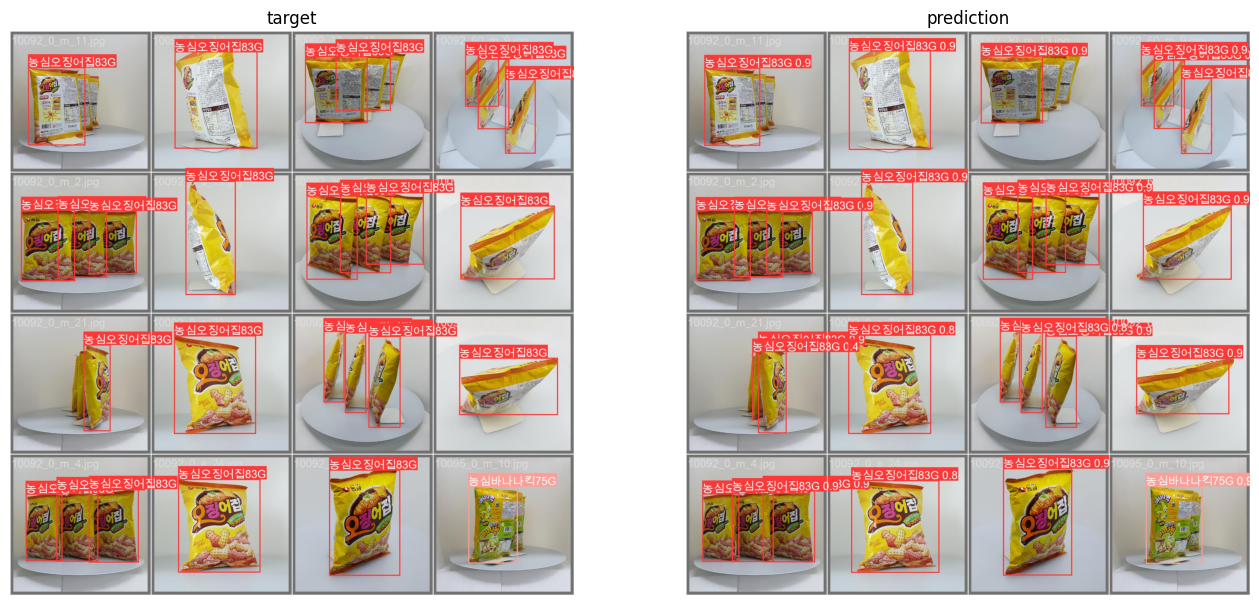

In [2]:
target = cv2.imread(os.path.join(IMG_PATH, 'val_batch0_labels.jpg'))
prediction = cv2.imread(os.path.join(IMG_PATH, 'val_batch0_pred.jpg'))

fig = plt.figure(figsize=(16,12))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
ax1.set_title('target')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB))
ax2.set_title('prediction')
ax2.axis("off")
 
plt.show()


### 02 Loss & Metrics
* `loss`: 전반적으로 우하향하는 것을 볼 수 있다.
    * `box_loss` : 바운딩박스의 좌표값을 학습할 때의 loss
    * `cls_loss` : 객체의 class를 학습할 때의 loss
    * `dfl_loss` : class 간의 불균형을 표현하는 loss
        * rare한 데이터를 분류할 때 loss를 증가시킴 → 모델이 rare한 데이터 분류를 정확하게 하게 만듦

* `metrics`: 전반적으로 우상향하는 것을 볼 수 있다. box를 기준으로 함
    * `precision`: 모델이 `오징어집`이라고 분류 한 것 중 진짜 `오징어집`
    * `recall`: 실제 `오징어집` 중 모델이 `오징어집`이라고 분류한 값
    * `mAP50` : IoU가 0.5 일때의 클래스 당 AP의 평균
    * `mAP50-95` : IoU가 0.5~0.95 사이일 때의 클래스 당 AP의 평균
        * IoU : (두 영역의 교집합) / (두 영역의 합집합)으로 예측된 영역과 실제 영역이 얼마나 겹치는 지를 나타내는 지표
        * AP : Precision-Recall 그래프의 아래 면적을 나타내는 값 → P,R 모두 높게 나타나는 모델이 성능이 좋은 것이므로 AP가 높을수록 성능이 좋은 것

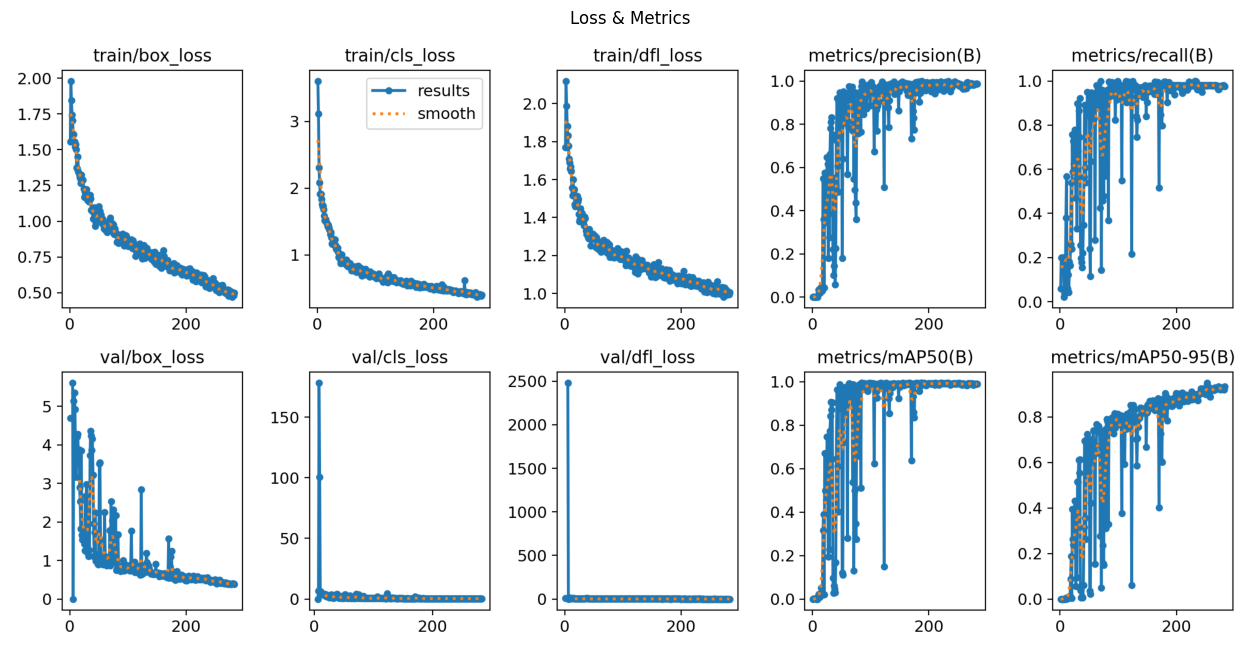

In [ ]:
result_img_path = os.path.join(IMG_PATH, "results.png")
result_img = cv2.imread(result_img_path)

fig = plt.figure(figsize=(16,12))
result = fig.add_subplot(1, 1, 1)
result.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
result.set_title('Loss & Metrics')
result.axis("off")
plt.show()

`PR_curve`는 `Precision(P)`과 `Recall(R)`의 그래프이고, `P`와 `R`은 반비례 관계에 있다.   
현재 그래프는 `PR_curve`가 정사각형 모양에 가까운 것을 확인할 수 있는데,  
각각의 값이 떨어지더라도 높은 score를 유지하고 있으므로 학습이 잘 이루어진 것임을 확인할 수 있다.  


`F1_curve`는 `F1 score`를 임계값을 변화시키면서 그린 그래프이다.  
  
`F1_score`는 `P`와 `R`의 조화평균으로 두 지표간의 균형을 나타낸다. 불균형한 데이터에서 사용하는 대표적인 metric이다. F1 score가 높을수록 모델의 P, R 모두 잘 유지하고 있는 것으로 간주된다. 모델에서 임계값을 낮게 설정하면 더 많은 샘플을 양성으로 예측을 할 것이기 때문에 `R`은 증가하나 `P`는 감소하는 경향을 보일 것이다. 이처럼 임계값을 수정해가면서 `F1_score`의 커브를 나타낸 것이 `F1_curve`이다.  
  
그래프의 결과를 확인해볼 때 양극단으로 갈수록 `F1_score`가 줄어드는 것을 확인할 수 있는데 모델의 임계치를 매우 낮게/높게 설정해서 `P`와 `R`사이의 균형이 깨졌기 때문에 발생한 결과라고 생각한다. 특히, Confidence가 0에 가까울 때보다 1에 가까울 때 F1_score가 0에 가까운 것을 확인할 수 있는데 이 이유는 양성 샘플이 0개에 가까운 경우 `P`와 `R`이 0이기 때문에 둘 다 0에 가까워지기 때문이다. 하지만 Confidence가 1에 가까운 경우에는 `R`은 증가하나 `P`는 감소하기 때문에 `F1_score`가 급격하게 떨어진다고 생각한다.

* 하늘색 선: 오징어집
* 노란색 선: 바나나킥 

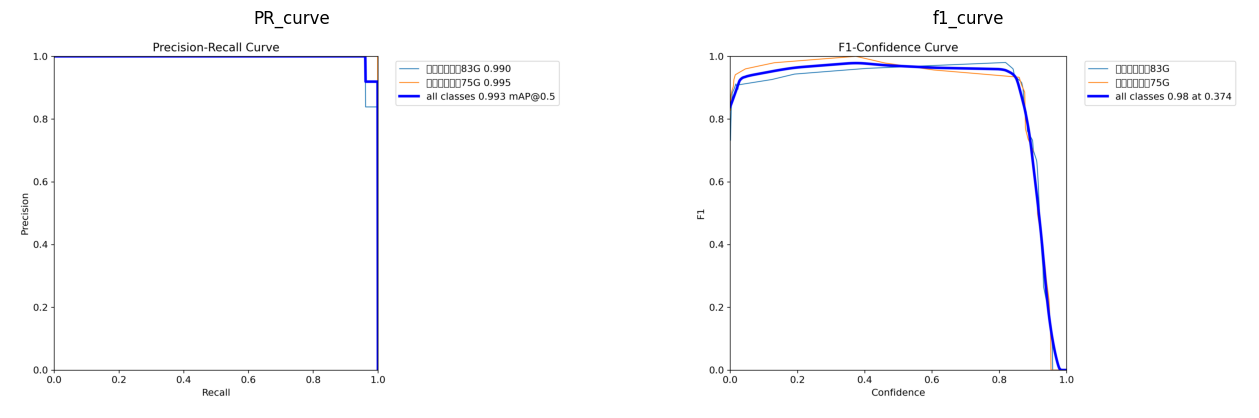

In [16]:
pr_curve = cv2.imread(os.path.join(IMG_PATH, "PR_curve.png"))
f1_curve = cv2.imread(os.path.join(IMG_PATH, 'F1_curve.png'))

fig = plt.figure(figsize=(16,12))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(pr_curve, cv2.COLOR_BGR2RGB))
ax1.set_title('PR_curve')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(f1_curve, cv2.COLOR_BGR2RGB))
ax2.set_title('f1_curve')
ax2.axis("off")
 
plt.show()